In [1]:
import numpy as np
from numpy import abs, sqrt, log10, sin, cos, exp, cosh, tanh, log, conj, cosh, sinh
np.set_printoptions(precision=16)
from math import pi, factorial
from numpy.random import rand
from numpy.linalg import norm
import scipy
import scipy.sparse as sp
from scipy.sparse import linalg, csc_matrix
import time
from scipy.optimize import minimize
from scipy.special import eval_hermite

%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ="retina"
import matplotlib as mpl
#mpl.rcParams["figure.dpi"] = 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

import pickle

### Panel a

[Text(2, 0, '$2$'),
 Text(4, 0, '$4$'),
 Text(10, 0, '$10$'),
 Text(20, 0, '$20$'),
 Text(40, 0, '$40$')]

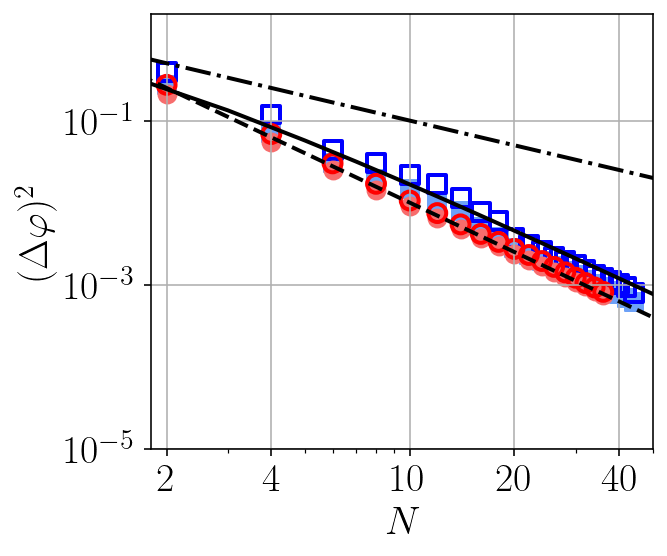

In [2]:
# We plot the results

plt.rcParams["figure.figsize"] = [4.5, 4]
fig, ax = plt.subplots(1, 1)
marker_size = 80
ax.grid()

# Emitters, coherent initial states
with open('cost_p_emitters_coherent_N_threshold_layers=5.p', 'rb') as fp:
    cost_preparation_list = pickle.load(fp)
with open('cost_m_emitters_coherent_N_threshold_layers=5.p', 'rb') as fp:
    cost_measurement_list = pickle.load(fp)
N_p_list = np.arange(4, 4+4*len(cost_preparation_list), 4) # Photon threshold per cavity
ax.scatter(N_p_list/2, -1/np.array(cost_preparation_list), marker='s', s=marker_size, color=[0.427, 0.631, 0.969], label=r'$\mathcal{F}^{-1}_{\rm Q}$ emitters')
ax.scatter(N_p_list/2, -1/np.array(cost_measurement_list), marker='s', s=marker_size, facecolors='none', edgecolors='blue', linewidth=2, label=r'$\mathcal{F}^{-1}_{\rm C}$ emitters')
# We divide N_p_list by 2 because N_p_list contains the total photon threshold for the two cavities combined, but we need to plot as a function of the mean photon number, which is half of it

# Kerr, coherent initial states
with open('cost_p_qfi_cfi_kerr_coherent_N_threshold_unbound_layers=5.p', 'rb') as fp:
    cost_preparation_list = pickle.load(fp)
with open('cost_m_qfi_cfi_kerr_coherent_N_threshold_unbound_layers=5.p', 'rb') as fp:
    cost_measurement_list = pickle.load(fp)
N_p_list = np.arange(4, 4+4*len(cost_preparation_list), 4) # Photon threshold per cavity
ax.scatter(N_p_list/2, -1/np.array(cost_preparation_list), s=marker_size, color=[0.969, 0.427, 0.427], label=r'$\mathcal{F}^{-1}_{\rm Q}$ Kerr')
ax.scatter(N_p_list/2, -1/np.array(cost_measurement_list), s=marker_size, color='red', facecolors='none', edgecolors='red', linewidth=2, label=r'$\mathcal{F}^{-1}_{\rm C}$ Kerr')
# We divide N_p_list by 2 because N_p_list contains the total photon threshold for the two cavities combined, but we need to plot as a function of the mean photon number, which is half of it

# Kerr, coherent initial states
with open('cost_p_qfi_cfi_kerr_coherent_N_threshold_fixed_U_layers=5.p', 'rb') as fp:
    cost_preparation_list = pickle.load(fp)
with open('cost_m_qfi_cfi_kerr_coherent_N_threshold_fixed_U_layers=5.p', 'rb') as fp:
    cost_measurement_list = pickle.load(fp)
N_p_list = np.arange(4, 4+4*len(cost_preparation_list), 4) # Photon threshold per cavity
ax.scatter(N_p_list/2, -1/np.array(cost_preparation_list), marker='^', s=marker_size, color=[0.427, 0.969, 0.427], label=r'$\mathcal{F}^{-1}_{\rm Q}$ fixed $\tilde{U}$')
ax.scatter(N_p_list/2, -1/np.array(cost_measurement_list), marker='^', s=marker_size, color='green', facecolors='none', edgecolors='green', linewidth=2, label=r'$\mathcal{F}^{-1}_{\rm C}$ fixed $\tilde{U}$')
# We divide N_p_list by 2 because N_p_list contains the total photon threshold for the two cavities combined, but we need to plot as a function of the mean photon number, which is half of it

N_p_list = np.arange(1, 54, 2) # Mean photon number list
sql = 1/N_p_list # Standard quantum limit
tfs = 1/(N_p_list*(N_p_list+2)/2) # Twin Fock states scaling
hl = 1/N_p_list**2 # Heisenberg scaling

fs = 20

ax.plot(N_p_list, sql, '-.k', linewidth=2, label='SQL')
ax.plot(N_p_list, tfs, '-k', linewidth=2, label='TFS')
ax.plot(N_p_list, hl, '--k', linewidth=2, label='HL')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$N$',fontsize=fs)
ax.set_ylabel(r'$(\Delta\varphi)^2$',fontsize=fs)
ax.tick_params(axis='both', labelsize=fs)

ax.set_xlim([1.8, 50])
ax.set_ylim([1e-5, 2])

ax.set_xticks([2, 4, 10, 20, 40])
ax.set_xticklabels(['$2$', '$4$', '$10$', '$20$', '$40$'])

### Panel b

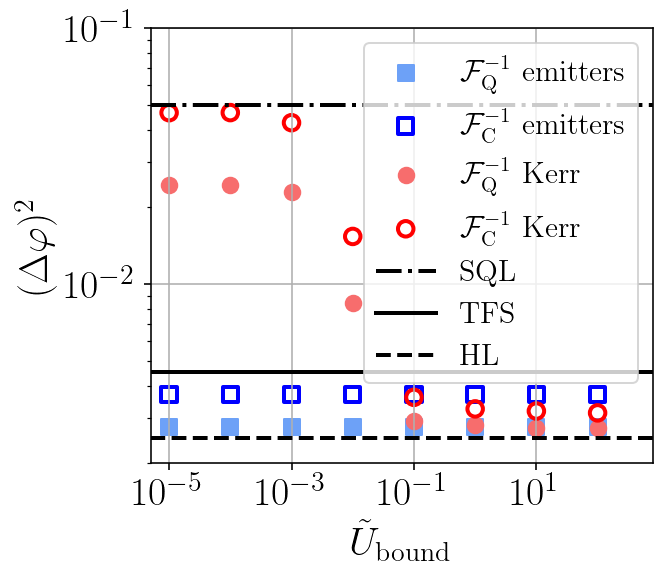

In [3]:
plt.rcParams["figure.figsize"] = [4.5, 4]
fig, ax = plt.subplots(1, 1)
marker_size = 60
ax.grid()

N_p = 40 # Number of photon threshold (mean photon number is this divided by 2)
index = 9 # Corresponding index in the list

# We load the data
with open('Figure2b_N_threshold_N={}.p'.format(N_p), 'rb') as fp:
    loaded_data = pickle.load(fp)
cost_p_list_kerr = loaded_data[0]
cost_m_list_kerr = loaded_data[1]
with open('cost_p_emitters_coherent_N_threshold_layers=5.p', 'rb') as fp:
    cost_preparation_list = pickle.load(fp)
cost_p_emitters = cost_preparation_list[index] 
with open('cost_m_emitters_coherent_N_threshold_layers=5.p', 'rb') as fp:
    cost_measurement_list = pickle.load(fp)
cost_m_emitters = cost_measurement_list[index] 

bound_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2] # List of bounds in U (Kerr non-linearity strength)

ax.scatter(bound_list, -1/cost_p_emitters*np.linspace(1, 1, len(bound_list)), marker='s', s=marker_size, color=[0.427, 0.631, 0.969], label=r'$\mathcal{F}^{-1}_{\rm Q}$ emitters')
ax.scatter(bound_list, -1/cost_m_emitters*np.linspace(1, 1, len(bound_list)), marker='s', s=marker_size, facecolors='none', edgecolors='blue', linewidth=2, label=r'$\mathcal{F}^{-1}_{\rm C}$ emitters')
ax.scatter(bound_list, -1/np.array(cost_p_list_kerr), s=marker_size, color=[0.969, 0.427, 0.427], label=r'$\mathcal{F}^{-1}_{\rm Q}$ Kerr')
ax.scatter(bound_list, -1/np.array(cost_m_list_kerr), s=marker_size, color='red', facecolors='none', edgecolors='red', linewidth=2, label=r'$\mathcal{F}^{-1}_{\rm C}$ Kerr')

N_p = N_p/2 # Mean photon numbers = Number of photon thresholds / 2
sql = 1/N_p # Standard quantum limit
tfs = 1/(N_p*(N_p+2)/2) # Twin Fock states scaling
hl = 1/N_p**2 # Heisenberg limit
bound_list_extended = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3] # List of bounds in U (Kerr non-linearity strength)
ax.plot(bound_list_extended, sql*np.linspace(1, 1, len(bound_list_extended)), '-.k', linewidth=2, label='SQL')
ax.plot(bound_list_extended, tfs*np.linspace(1, 1, len(bound_list_extended)), '-k', linewidth=2, label='TFS')
ax.plot(bound_list_extended, hl*np.linspace(1, 1, len(bound_list_extended)), '--k', linewidth=2, label='HL')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([5e-6, 8e2])
ax.set_ylim([2e-3, 1e-1])

ax.set_xticks([1e-5, 1e-3, 1e-1, 1e1])

ax.set_xlabel(r'$\tilde{U}_{\rm bound}$',fontsize=fs)
ax.set_ylabel(r'$(\Delta\varphi)^2$',fontsize=fs)
ax.tick_params(axis='both', labelsize=fs)
legend = ax.legend(loc='best', fontsize=15)